In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="white")
sns.set_context("talk")

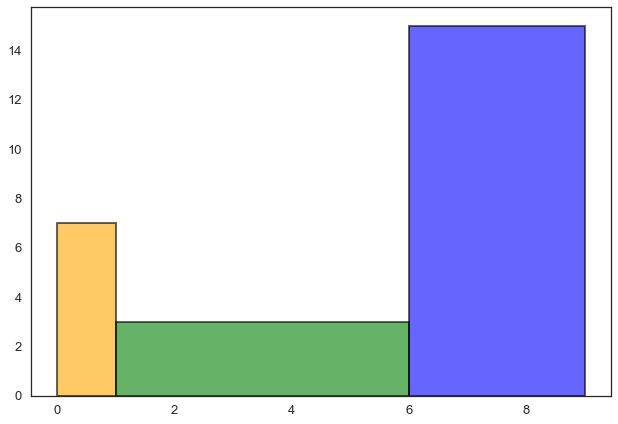

In [2]:
# small example
data = [7, 3, 15]
widths = [1, 5, 3]
left = [0, 1, 6]
sns.plt.bar(left, data, width = widths, color=('orange','green','blue'), 
    alpha = 0.6, align='edge', edgecolor = 'k', linewidth = 2)
sns.plt.show()

In [3]:
df = pd.read_csv('raw/2016-17-ClassCentral-Survey-data-noUserText.csv', decimal=',', encoding = "ISO-8859-1")

In [4]:
age = df['What is your age range?'].value_counts()
age
#age.hist()

46-55 years old    475
36-45 years old    420
56-65 years old    402
66+ years old      285
30-35 years old    253
22-25 years old    203
26-29 years old    199
18-21 years old    176
10-17 years old     51
Name: What is your age range?, dtype: int64

In [5]:
age[0]

475

In [6]:
age[1]

420

In [7]:
age.index

Index(['46-55 years old', '36-45 years old', '56-65 years old',
       '66+ years old', '30-35 years old', '22-25 years old',
       '26-29 years old', '18-21 years old', '10-17 years old'],
      dtype='object')

In [8]:
from_age =age.index.map(lambda x: x[:2]).astype(np.int)

In [9]:
to_age = age.index.map(lambda x: x[3:5])
print(to_age == ' y')
to_age.values[to_age == ' y'] = '75' # dummy max age
to_age = to_age.astype(np.int)

[False False False  True False False False False False]


In [10]:
widths = to_age - from_age + 1
widths

Int64Index([10, 10, 10, 10, 6, 4, 4, 4, 8], dtype='int64')

In [11]:
age_df = pd.DataFrame({'from': from_age, 'to': to_age, 'span': widths, 'count': age})

In [12]:
sorted_age = age_df.sort_values('from')

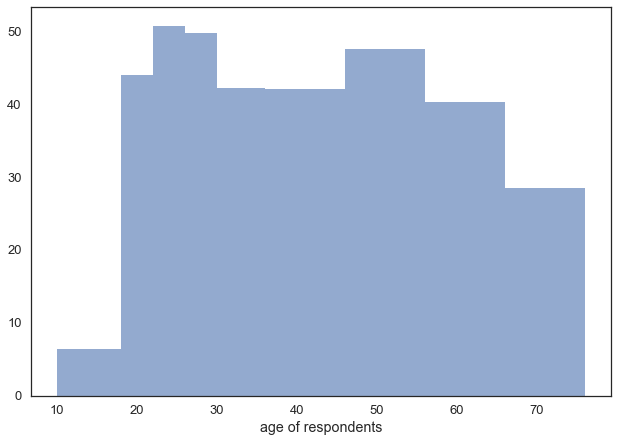

In [13]:
sns.plt.bar(sorted_age['from'], sorted_age['count']/sorted_age['span'], width = sorted_age['span'], 
    alpha = 0.6, align='edge')
sns.plt.xlabel('age of respondents')
sns.plt.show()